# Counterfactual emissions scenarios

A SIMPLE EMISSIONS DECOMPOSITION MODEL OF COUNTERFACTUAL EMISSIONS PATHWAYS from the article "Slameršak, A., Kallis, G., O'Neill, D.W., and Hickel, J. (2022). From low-growth to post-growth scenarios of climate mitigation. (In peer-review)".


# Introduction

The urgency of climate change mitigation has been recognised at the international governance stage since 1990. However, the general agreement on the problem has yet to translate into an effective action to curb global emissions, which have grown by 60% since 1990. As a result of increasing emissions, we are in a state of accelerated global heating and rapidly approaching the turning point beyond which it will be theoretically impossible to stabilize the global warming between 1.5 °C and 2 °C, as pledged by the Paris Agreement. To meet the Paris Agreement goals we need to keep total carbon emissions within the carbon budget limit, which is estimated at 340 GtCO2 for 1.5 °C and at 1090 GtCO2 for 2 °C of global warming. Staying within those carbon budgets will require a far-reaching and an unprecedented transformation of our economies, lifestyles, and energy systems (IPCC, 2018). In other words, adequate climate mitigation action requires a decisive break with the historical pathway of development.

In this exercise, we will explore by how much the key emissions drivers would need to change to stabilize global warming below 1.5 °C, had we started to mitigate earlier than 2022. By exploring alternative histories of mitigation (counterfactual scenarios), we will analysie how the conditions for accomplishing sufficient emission reductions have changed due to increasing emissions over time.

# Possible exercises

Get acquainted with the model by trying to answer these questions

1. Find what would be the necessary rate of annual emissions reductions for staying below 1.5 degrees if we started reducing emissions this year (2022). How would this rate change, had we started mitigation earlier?

2. Which of the emissions drivers has been historically the most important?

3. By how much would the emissions have changed, had the global economic growth from 2007 to 2021 increased by two-fold (as the IMF has been projecting before the 2008 financial crisis), if we leave other assumptions unchanged?

4. If you set all the mitigation levers (all the parameters) to the most ambitious values starting in 2016 (the year after the Paris Agreement was signed), would that be enough to stabilize global warming below 1.5 degrees? How significant is the gap, if there is one?

5. By how much should we have raised the mitigation action in 1991, had we wanted to accomplish the ambition of the Toronto Conference for CO2 emissions reduction of 20% by 2005. 

# Ideas for the Assignment

Come up with a research question related to the climate impacts and/or necessary mitigation measures to reduce them. Design a counterfactual scenario to address this question. Think of an alternative trajectory of development and write down a short narrative description of your scenario. In the narrative description, provide qualitative information concerning the changes for all of the emissions drivers. Argue about the feasibility of the scenario. Select the starting year and the parameters of emissions drivers consistently with your narrative. You can design multiple scenarios and compare the results.

Research question example: 

By how much should we have raised the mitigation action in 1991, had we wanted to accomplish the mitigation advice of the Toronto Conference for CO2 emissions reduction of 20% by 2005.To address this question, we explore the parameters related to the efficient use of energy and the decarbonisation of energy generation, but do not assume any changes to population and economic growth.


In [2]:
#-----IMPORTING LIBRARIES-----
import numpy as np
import pandas as pd
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [18]:
#-----IMPORTING HISTORICAL DATA-----
df = pd.read_excel('data/counterfactual_scenarios_data.xlsx', 'Historical data')
df.head()

CO2_emissions = df['CO2 Emissions (GtCO2)'].to_numpy() # Global CO2 emissions from antropogenic activities [GtCO2]
Final_energy = df['Final Energy (EJ)'].to_numpy() * 10**9 # Final energy consumption [GJ]
GDP = df['GDP ($)'].to_numpy() #  Gross Domestic Product [$]
Population = df['Population '].to_numpy() #  Population [Number of people]
Low_carbon_penetration = df['Low carbon penetration (%)'].to_numpy() #  Share of Low-carbon energy in Final energy consumption [from 0% to 100%]

# Emissions Drivers

The original IPAT equation relates environmental impacts to population, affluence, and technology, as shown in Equation 1.


$$ Impact = Population\cdot Affluence\cdot Technology \; \; \;  (1) $$


In 1990s, Yoichi Kaya adapted the IPAT equation for the analysis of the underlying drivers (factors) of anthropogenic CO2 emissions from energy.(Kaya, 1990) The KAYA equation relates CO2 to population, per-capita gross domestic product (GDPpc), carbon intensity of energy consumption (CIec), and energy intensity of gross domestic product (EI), as shown in Equations 2 and 3. Energy intensity of GDP can be interpreted as a measure of energy efficiency of the economy. Carbon intensity can be interpreted as the carbon footprint of our system of energy generation.


$$ CO_{2}= Population\cdot \frac{GDP}{Population}\cdot \frac{CO_{2}}{Energy}\cdot \frac{Energy}{GDP} \; \; \; (2) $$




$$ CO_{2}= Population\cdot GDPpc\cdot CIec\cdot EI \; \; \; (3) $$


While Equation 3 allows us to analyse the dependence of CO2 emissions on the underlying emissions factors, it is a bit difficult to relate to the mitigation policy which is commonly framed around the transition to low-carbon energy sources. To represent this, we decompose the carbon intensity of energy into two factors, which are: the share of low-carbon energy, and the carbon intensity of energy from fossil fuels. Here, low-carbon energy which includes all the energy generated from the renewables, nuclear energy and biomass which are assumed to generate zero direct carbon emissions. Carbon intensity of energy from fossil fuels describes the carbon footprint of part of the energy system that is not low-carbon. Carbon intensity of energy from fossil fuels changes if there is a substitution between different fossil fuel sources, for example, if there is a switch from coal to gas.

$$ CO_{2}= Population\cdot GDPpc\cdot (1-Lowcarbon_{\%})\cdot \frac{CO_{2}}{Energy}\cdot \frac{Energy}{GDP} \; \; \; (4) $$



In [4]:
#-----DEFINING EMISSIONS DRIVERS-----
Energy_intensity = Final_energy/GDP  # Energy intensity of Gross Domestic Product [GJ/$]
Carbon_intensity_FF = CO2_emissions * 10**9 / (Final_energy * (1 - 0.01 * Low_carbon_penetration))  # Carbon intensity of energy [tCO2/GJ]
GDP_per_capita = GDP / Population # Global Gross Domestic Product per capita [$/capita]
Low_carbon_energy = Final_energy * Low_carbon_penetration * 0.01  # Final energy consumption from low-carbon sources (renewables & nuclear) [GJ]
FF_energy = Final_energy - Low_carbon_penetration  # Final energy consumption from fossil fuel sources [GJ]
Carbon_intensity_tot = CO2_emissions / Final_energy*10**9 # Carbon intensity of total final energy [tCO2/GJ]

# Designing a counterfactual scenario

We calculate the average annual change of each of the emissions drivers (y) over  from 1990 to 2021 (𝛥t), as shown in Equation 5. We use historical changes of emissions drivers as a benchmark to which we will compare the counterfactual scenarios.

$$ r_{y}= (\frac{y_{t+\Delta t}}{y_{t}})^{\frac{1}{\Delta t}}-1 \; \; \; (5) $$


We now provide the underlying assumptions of the counterfactual scenarios. We do so by defining the values of the emissions drivers multipliers (m), which relate the assumed annual change in counterfactual scenarios to the average historical annual change, as shown in Equation 6. For example, by assuming the multiplier for low-carbon energy of 1.2, you assume a 20% faster deployment of low-carbon energy. The multiplier value of 1.0 (default) assumes average annual change in the counterfactual correspond to the historical values.

$$ r_{y,counterfactual}= m_{y}\cdot r_{y,historical}  \; \; \; (6) $$

Values of emissions drivers in counterfactual scenario are then calculated as:

$$ y_{counterfactual}(t+1)=y_{counterfactual}(t)\cdot (1 + m_{y} \cdot r_{y,historical})  \; \; \; (7) $$
 
You can design your own scenario by adjusting the following parameters:

-	Average population growth

-	Economic growth expressed in GDPpc

-	Growth in low carbon energy

-	Energy efficiency improvements in the economy 

-	Carbon intensity improvements of fossil fuels

-   Year when the counterfactual scenario starts to deviate from the historical pathway

We provide some guidelines for the choice of parameters in Table 1, but you can also explore scenarios outside the range (just provide justification in the assignments, and try not to crash the model). In addition, you can also select the start year when your scenario begins to deviate from the historical values. The chosen set of assumptions will form a unique counterfactual scenario of emissions. The prepared script of the model will compare your counterfactual scenario to the historical values (see example in Figure 3).

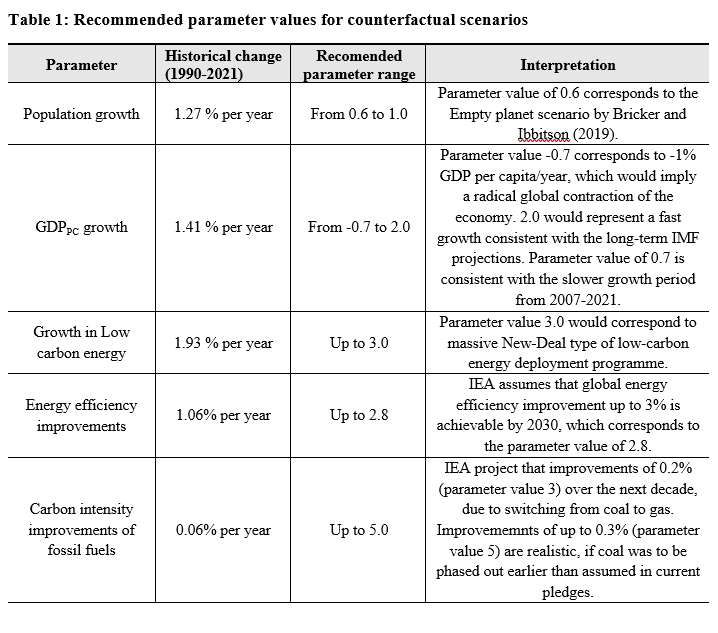


In [5]:
#-----HISTORICAL AVERAGE CHANGES from 1990 to 2021-----
Avg_Energy_intensity_improvement = 100*((Energy_intensity[-1]/Energy_intensity[0])**(1/31)-1)  # Change in Energy intensity
Avg_Carbon_intensity_FF_improvement = 100*((Carbon_intensity_FF[-1]/Carbon_intensity_FF[0])**(1/31)-1)  # Change in Carbon intensity of fossil fuel sources (Carbon intensity can change due to fuel switching, for example from coal to natural gas
Avg_GDP_per_capita_growth = 100*((GDP_per_capita[-1]/GDP_per_capita[0])**(1/31)-1)  # Growth in GDP per capita
Avg_low_carbon_growth = 100*((Low_carbon_energy[-1]/Low_carbon_energy[0])**(1/31)-1)  # Growth in Low carbon energy
Population_growth = 100*((Population[-1]/Population[0])**(1/31)-1)  # Population growth

In [90]:
#----COUNTERFACTURAL ASSUMPTIONS-----
Multiplicator_Energy_intensity = 1  # [0 - no change, 1 - historical value, 2 - twice as fast (ambitious), 3 - very ambitiou, >3 (difficult to achieve)] - > By how much (faster/slower) was energy intensity to change compared to the historical value of 1.06% per year
counterfactual_intensity_improvement = Multiplicator_Energy_intensity*Avg_Energy_intensity_improvement

Multiplicator_Carbon_intensity = 1  # [-1 - transition to a coal-powered world,  0 - no change, 1 - historical value, 5 - switching from coal to gas (ambitious)] - > By how much (faster/slower) was carbon intensity of fossil fuels to change compared to the historical value of 0.06% per year
counterfactual_carbon_intensity_FF_improvement = Multiplicator_Carbon_intensity*Avg_Carbon_intensity_FF_improvement

Multiplicator_GDP_per_capita = 1  # [-1 -> deep degrowth scenario, -0.5 -> slow degrowth, 0 -> steady-state economy, 0.5 -> secular stagnation, 1 - historical value, 2 - fast GDP growth] - > By how much (faster/slower) was GDP per capita to change compared to the historical value of 1.41% per year
counterfactual_GDP_per_capita_growth = Multiplicator_GDP_per_capita*Avg_GDP_per_capita_growth

Multiplicator_low_carbon = 1  # [1 - historical value (slow deployment of renewables), 1.5 -> 50% faster deployment (moderately ambitiou), 2-> 100% faster deployment (very ambitious)] - > By how much (faster/slower) was growth of low-carbon energy compared to the historical value of 1.93% per year
counterfactual_low_carbon_growth = Multiplicator_low_carbon*Avg_low_carbon_growth

Multiplicator_population = 1  # [0.5 -> Empty planet scenario, 1 - historical value, 1.5 -> 50% faster population growth] - > By how much (faster/slower) was population growth compared to the historical value of 1.28% per year
counterfactual_population_growth = Multiplicator_population*Population_growth

In [91]:
#-----TIME RANGE-----
year1 = np.arange(1990, 2021+1, 1) # Our data are from 1990 to 2021  
year2 = np.arange(2021, 2051, 1)
first_year = 1990  # Begining of the time series
start_year = 2016  # What year do you want to deviate from the historical trajectory?

start = start_year - first_year

In [92]:
#-----EMISSIONS FACTORS IN COUNTERFACTURAL SCENARIOS-----
counterfactual_CO2_emissions = np.zeros(32)
counterfactual_Energy_intensity = np.zeros(32)
counterfactual_Low_carbon_penetration = np.zeros(32)
counterfactual_Low_carbon_energy = np.zeros(32)
counterfactual_Final_energy = np.zeros(32)
counterfactual_FF_energy = np.zeros(32)
counterfactual_Carbon_intensity_FF = np.zeros(32)
counterfactual_GDP_per_capita = np.zeros(32)
counterfactual_Population = np.zeros(32)

In [93]:
#-----COUNTERFACTUAL SCENARIO IS THE SAME AS THE HISTORICAL SCENARIO BEFORE THE START YEAR-----
counterfactual_Energy_intensity[0:start] = Energy_intensity[0:start]
counterfactual_Final_energy[0:start] = Final_energy[0:start]
counterfactual_Low_carbon_energy[0:start] = Low_carbon_energy[0:start]
counterfactual_FF_energy[0:start] = FF_energy[0:start]
counterfactual_Low_carbon_penetration[0:start] = counterfactual_Low_carbon_energy[0:start] / counterfactual_Final_energy[0:start]
counterfactual_Carbon_intensity_FF[0:start] = Carbon_intensity_FF[0:start]
counterfactual_CO2_emissions[0:start] = CO2_emissions[0:start]
counterfactual_GDP_per_capita[0:start] = GDP_per_capita[0:start]
counterfactual_Population[0:start] = Population[0:start]

In [94]:
#-----IPAT EQUATION FOR THE MODELLING OF COUNTERFACTUAL SCENARIOS-----
for j in np.arange(start-1, 31, 1):

    if Multiplicator_Energy_intensity == 1:
        counterfactual_Energy_intensity[j+1] = Energy_intensity[j+1] 
    else:
        counterfactual_Energy_intensity[j+1] = counterfactual_Energy_intensity[j]*(1 + 0.01*counterfactual_intensity_improvement);

    if Multiplicator_low_carbon == 1:
        counterfactual_Low_carbon_energy[j+1] = Low_carbon_energy[j+1] 
    else:
        counterfactual_Low_carbon_energy[j+1]  = counterfactual_Low_carbon_energy[j]*(1 + 0.01*counterfactual_low_carbon_growth);  

    if Multiplicator_GDP_per_capita == 1:
        counterfactual_GDP_per_capita[j+1]  = GDP_per_capita[j+1] 
    else:
        counterfactual_GDP_per_capita[j+1] = counterfactual_GDP_per_capita[j]*(1 + 0.01*counterfactual_GDP_per_capita_growth);

    if Multiplicator_population == 1:
        counterfactual_Population[j+1] = Population[j+1] 
    else:
        counterfactual_Population[j+1] = counterfactual_Population[j]*(1 + 0.01*counterfactual_population_growth);  

    if Multiplicator_Carbon_intensity == 1:
        counterfactual_Carbon_intensity_FF[j+1] = Carbon_intensity_FF[j+1] 
    else:
        counterfactual_Carbon_intensity_FF[j+1] = counterfactual_Carbon_intensity_FF[j]*(1 + 0.01*counterfactual_carbon_intensity_FF_improvement)
    
    counterfactual_Final_energy[j+1] = counterfactual_Energy_intensity[j+1]*counterfactual_GDP_per_capita[j+1]*counterfactual_Population[j+1]
    counterfactual_FF_energy[j+1] = counterfactual_Final_energy[j+1] - counterfactual_Low_carbon_energy[j+1]
    counterfactual_Low_carbon_penetration[j+1] = counterfactual_Low_carbon_energy[j+1]/counterfactual_Final_energy[j+1]
    counterfactual_CO2_emissions[j+1] = (counterfactual_Energy_intensity[j+1]
        *(1 - counterfactual_Low_carbon_penetration[j+1])*counterfactual_Carbon_intensity_FF[j+1]
        *counterfactual_GDP_per_capita[j+1]*counterfactual_Population[j+1]*10**(-9))

# Coupling and Decoupling analysis

Coupling describes how closely two select variables are connected over time. In our case, we explore the links between the GDP per capita, and the ‘impact variables’ which are the CO2 emissions and energy consumption. Hyper-coupling happens when CO2 emissions (energy consumption) grow faster than the economy. Relative decoupling is when the emissions (energy consumption) grow slower than the economy. Absolute decoupling is when CO2 emissions (energy consumption) decrease while the economy continues to grow. The three modes of (de)coupling are shown in the following figure:

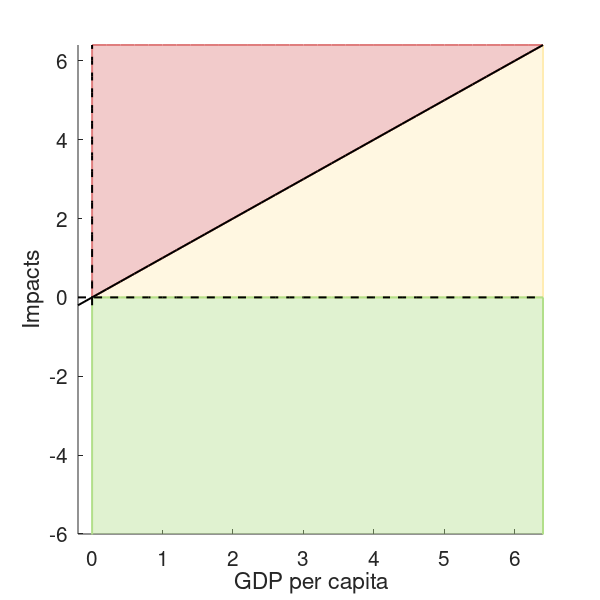

## Decomposition analysis

CO2 emissions can be related to the product of emissions drivers, as described Equations 1‒4. A change in emissions then depends on the change of emissions drivers. To find how much of the change in emissions can be attributed to each of the drivers, we need to perform the decomposition analysis, as shown in Equation 5.

$$ ΔCO_{2}= dCI' + dEI' + dGDP'  \; \; \; (8) $$

Decomposition analysis requires some knowledge of linear algebra which we will not explain here in detail. For those who are interested, we decompose the emissions between the drivers from Equation 2 using the Shapley value decomposition approach (Ang et al., 2003), which is a commonly used method in simple decomposition analysis studies (Robaina Alves and Moutinho, 2013; Štreimikiene and Balezentis, 2016). For the sake of simplicity, we aggregate the drivers of population and GDPpc into GDP.


In [95]:
#-----DECOMPOSITION FACTORS IN A COUNTERFACTUAL SCENARIO------
Carbon_intensity_counterfactual_tot = counterfactual_CO2_emissions/counterfactual_Final_energy;
GDP_counterfactual = counterfactual_GDP_per_capita*counterfactual_Population;
Energy_intensity_counterfactual = counterfactual_Final_energy/GDP_counterfactual;

In [96]:
#-----ANNUAL GROWTH RATES-----
Growth_GDP_historical = 100*(GDP_per_capita[1:]/GDP_per_capita[:-1] - 1)
Growth_Energy_historical = 100*(Final_energy[1:]/Final_energy[:-1] - 1)
Growth_CO2_historical = 100*(CO2_emissions[1:]/CO2_emissions[:-1] - 1)

Growth_GDP_counterfactual = 100*(counterfactual_GDP_per_capita[1:]/counterfactual_GDP_per_capita[:-1] - 1)
Growth_Energy_counterfactual = 100*(counterfactual_Final_energy[1:]/counterfactual_Final_energy[:-1] - 1)
Growth_CO2_counterfactual = 100*(counterfactual_CO2_emissions[1:]/counterfactual_CO2_emissions[:-1] - 1)

In [97]:
#-----DIFFERENCE IN TOTAL ANTROPOGENIC EMISSIONS BETWEEN REAL HISTORY AND THE COUNTERFACTUAL SCENARIO-----
Diff_counterfactual = np.sum((CO2_emissions[start-1:] - counterfactual_CO2_emissions[start-1:]))

#-----1.5 DEGREE COMPATIBLE PATHWAY FROM 2021 UNDER THE HISTORICAL SCENARIO-----
Emissions_15 = [CO2_emissions[31], 1/2*CO2_emissions[31], 1/4*CO2_emissions[31], 1/8*CO2_emissions[31]]  # we need to halve carbon emissions every decade
Emissions_15_interp = CubicSpline([2021, 2030, 2040, 2050], Emissions_15)(np.arange(2021, 2051, 1))

In [98]:
#-----FINDING THE 1.5 DEGREE COMPATIBLE PATHWAY FROM 2021 UNDER THE COUNTERFACTUAL SCENARIO-----
r = np.arange(-0.15, 0.01, 0.001)  
aux = np.zeros(160);

for t in np.arange(0, 160, 1):
    aux[t] = sum(counterfactual_CO2_emissions[31]*(1+r[t])**np.arange(1, 60, 1)) - np.sum(Emissions_15_interp) - Diff_counterfactual

minVal = np.min(np.abs(aux))
i = np.where(np.abs(aux) == minVal)[0][0]

counterfactual_Emissions_15 = counterfactual_CO2_emissions[31]*(1+r[i])**np.arange(0, 60, 1)

# Model Outputs

The implementation of the model in the Jupyter Notebook offers the following tools for analysis and data visualisations of the modelling outputs:

a) Visualisation of emissions pathways and data on the average mitigation rates in the scenarios.

b) Visualisation of emissions factors of the historical data and the counterfactual scenario.

c) The map of the decoupling space.

d) Decomposition analysis for the three emissions factors described in Equation 3.


# a) Emissions pathways and neccessary emissions reductions

Here you can compare the historal pathway and the counterfactual scenario with regards to annual emissions reductions from 2022 onwards that are neccessary to stay stabilize global warming below 1.5 degrees (dashed line in the figure).

In [99]:
100*((pd.Series(counterfactual_CO2_emissions)[31]/pd.Series(counterfactual_CO2_emissions)[start])**(1/(31-start))-1) # Average annual change in emissions in the counterfactual scenario from the start year to 2021

0.31425706032317535

In [100]:
100*r[i] # Neccessary average change in the emissions in the counterfactual scenario from 2022

-7.299999999999993

In [101]:
100*((pd.Series(Emissions_15_interp)[29]/pd.Series(CO2_emissions)[29])**(1/29)-1) # Neccessary average change in the emissions in the historical pathway from 2022

-6.9782526504622915

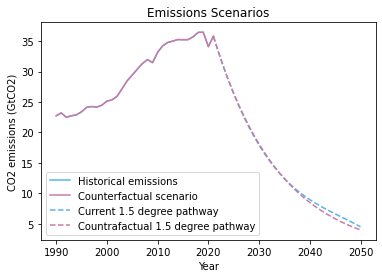

In [102]:
plt.plot(year1, CO2_emissions, label='Historical emissions', color = [0.337, 0.706, 0.914])
plt.plot(year1, counterfactual_CO2_emissions, label='Counterfactual scenario', color = [204/255, 121/255, 167/255])
plt.plot(year2, Emissions_15_interp, label='Current 1.5 degree pathway', linestyle = '--', color = [0.337, 0.706, 0.914])
plt.plot(year2, counterfactual_Emissions_15[0:30], label='Countrafactual 1.5 degree pathway', linestyle = '--', color = [204/255, 121/255, 167/255])
plt.xlabel('Year')
plt.ylabel('CO2 emissions (GtCO2)')
plt.title('Emissions Scenarios')
plt.legend()

# b) Emissions Factors

Here you can see the emissions factors in the historical dataset and compare it to the counterfactual scenario.

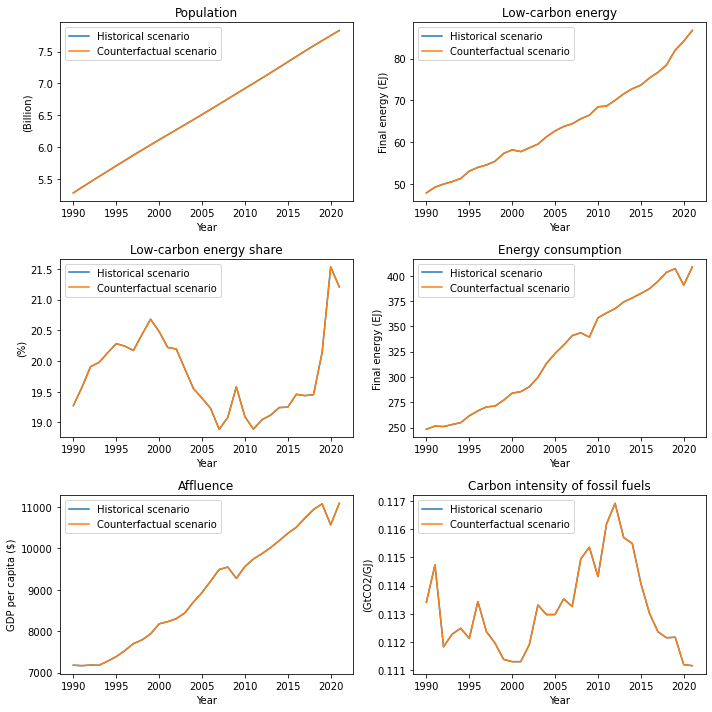

In [103]:
#-----EMISSIONS FACTORS AND AUXILIARY VARIABLES-----

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs = [item for sublist in axs for item in sublist]

plot_vars = [
    (Population / 10**9, counterfactual_Population / 10**9, '(Billion)', 'Population'),
    (Low_carbon_energy/ 10**9, counterfactual_Low_carbon_energy/ 10**9, 'Final energy (EJ)', 'Low-carbon energy'),
    (Low_carbon_penetration, 100*counterfactual_Low_carbon_penetration, '(%)', 'Low-carbon energy share'),
    (Final_energy/10**9, counterfactual_Final_energy/10**9, 'Final energy (EJ)', 'Energy consumption'),
    (GDP_per_capita, counterfactual_GDP_per_capita, 'GDP per capita ($)', 'Affluence'),
    (Carbon_intensity_FF, counterfactual_Carbon_intensity_FF, '(GtCO2/GJ)', 'Carbon intensity of fossil fuels'),
]

for ax, (x1, x2, label, title) in zip(axs, plot_vars):

    ax.plot(year1, x1, label='Historical scenario')
    ax.plot(year1, x2, label='Counterfactual scenario')
    ax.legend()
    ax.set_title(title);
    ax.set_ylabel(label);
    ax.set_xlabel('Year');

plt.tight_layout()

# Decoupling

See if your assumptions for the counterfactual scenario imply a relative or an absolute decoupling between the GDP and emissions, and the GDP and energy.

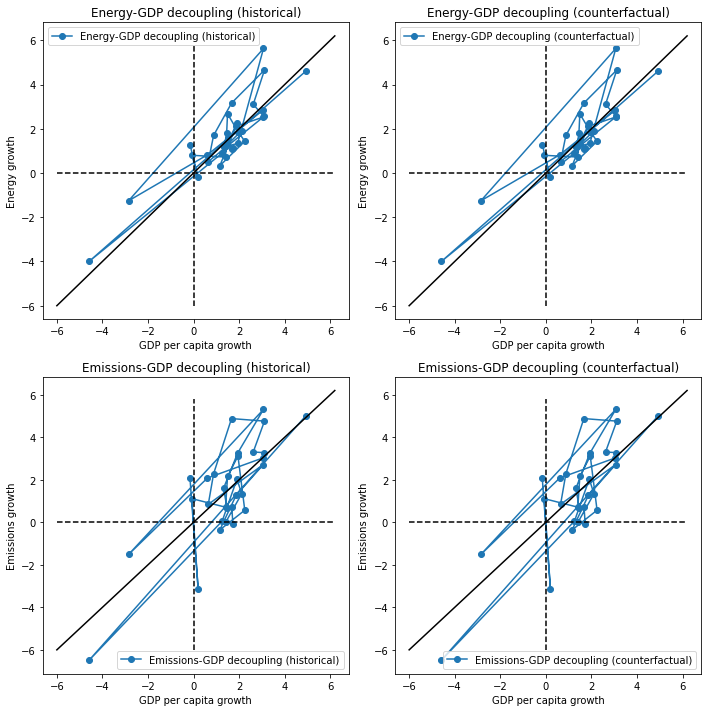

In [104]:
#-----DECOUPLING ANALYSIS-----
#-----Annual growth rates-----
Growth_GDP_historical = 100*(GDP_per_capita[1:]/GDP_per_capita[:-1] - 1)
Growth_Energy_historical = 100*(Final_energy[1:]/Final_energy[:-1] - 1)
Growth_CO2_historical = 100*(CO2_emissions[1:]/CO2_emissions[:-1] - 1)

Growth_GDP_counterfactual = 100*(counterfactual_GDP_per_capita[1:]/counterfactual_GDP_per_capita[:-1] - 1)
Growth_Energy_counterfactual = 100*(counterfactual_Final_energy[1:]/counterfactual_Final_energy[:-1] - 1)
Growth_CO2_counterfactual = 100*(counterfactual_CO2_emissions[1:]/counterfactual_CO2_emissions[:-1] - 1)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = [item for sublist in axs for item in sublist]

plot_vars = [
    (Growth_GDP_historical, Growth_Energy_historical, 'GDP per capita growth', 'Energy growth', 'Energy-GDP decoupling (historical)'),
    (Growth_GDP_counterfactual, Growth_Energy_counterfactual, 'GDP per capita growth', 'Energy growth', 'Energy-GDP decoupling (counterfactual)'),
    (Growth_GDP_historical, Growth_CO2_historical, 'GDP per capita growth', 'Emissions growth', 'Emissions-GDP decoupling (historical)'),
    (Growth_GDP_counterfactual, Growth_CO2_counterfactual, 'GDP per capita growth', 'Emissions growth', 'Emissions-GDP decoupling (counterfactual)'),
]

for ax, (x1, x2, label1, label2, title) in zip(axs, plot_vars):

    ax.plot(x1, x2, label=title, marker="o", linestyle="-")
    ax.plot(np.arange(-6.0, 6.4, 0.2), np.arange(-6.0, 6.4, 0.2), color = ([0, 0, 0]));
    ax.plot(np.arange(-6.0, 6.4, 0.2), np.zeros(62), color = ([0, 0, 0]), linestyle="--");
    ax.plot(np.zeros(60), np.arange(-6.0, 6.0, 0.2), color = ([0, 0, 0]), linestyle="--");
    ax.legend()
    ax.set_title(title);
    ax.set_ylabel(label2);
    ax.set_xlabel(label1);

plt.tight_layout()


# Decomposition

Find which emissions factors define the counterfactual emissions pathway from 1990 to 2021. Find if your mitigation plan and/or a different socio-economic development have succeed at holding the emissions in check!

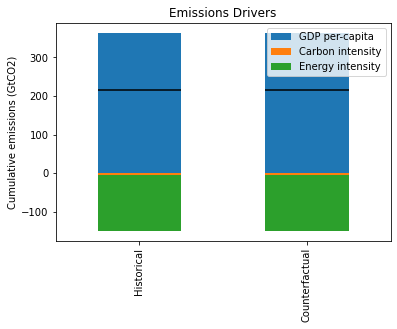

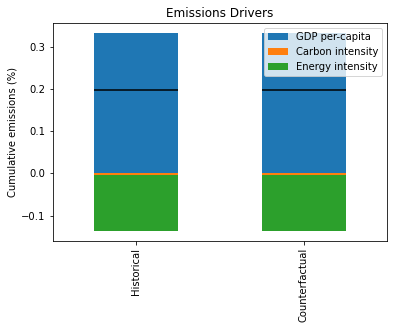

In [105]:
Ci_driver = np.zeros(32)
Energy_driver = np.zeros(32)
GDP_driver = np.zeros(32)

Ci_driver_counterfactual = np.zeros(32)
Energy_driver_counterfactual = np.zeros(32)
GDP_driver_counterfactual = np.zeros(32)

Carbon_intensity_tot_counterfactual = counterfactual_CO2_emissions/counterfactual_Final_energy*10**9
GDP_counterfactual = counterfactual_GDP_per_capita*counterfactual_Population
Energy_intensity_counterfactual = counterfactual_Final_energy/GDP_counterfactual

for t in np.arange(0, 31, 1):
  Ci_driver[t+1] = 1/3*(Carbon_intensity_tot[t+1]*Energy_intensity[t]*GDP[t] - Carbon_intensity_tot[t]*Energy_intensity[t]*GDP[t]) + 1/6*(Carbon_intensity_tot[t+1]*Energy_intensity[t+1]*GDP[t] - Carbon_intensity_tot[t]*Energy_intensity[t+1]*GDP[t] + Carbon_intensity_tot[t+1]*Energy_intensity[t]*GDP[t+1] - Carbon_intensity_tot[t]*Energy_intensity[t]*GDP[t+1]) + 1/3*(Carbon_intensity_tot[t+1]*Energy_intensity[t+1]*GDP[t+1] - Carbon_intensity_tot[t]*Energy_intensity[t+1]*GDP[t+1])
  Energy_driver[t+1] = 1/3*(Carbon_intensity_tot[t]*Energy_intensity[t+1]*GDP[t] - Carbon_intensity_tot[t]*Energy_intensity[t]*GDP[t]) + 1/6*(Carbon_intensity_tot[t+1]*Energy_intensity[t+1]*GDP[t] - Carbon_intensity_tot[t+1]*Energy_intensity[t]*GDP[t] + Carbon_intensity_tot[t]*Energy_intensity[t+1]*GDP[t+1] - Carbon_intensity_tot[t]*Energy_intensity[t]*GDP[t+1]) + 1/3*(Carbon_intensity_tot[t+1]*Energy_intensity[t+1]*GDP[t+1] - Carbon_intensity_tot[t+1]*Energy_intensity[t]*GDP[t+1])
  GDP_driver[t+1] = 1/3*(Carbon_intensity_tot[t]*Energy_intensity[t]*GDP[t+1] - Carbon_intensity_tot[t]*Energy_intensity[t]*GDP[t]) + 1/6*(Carbon_intensity_tot[t+1]*Energy_intensity[t]*GDP[t+1] - Carbon_intensity_tot[t+1]*Energy_intensity[t]*GDP[t] + Carbon_intensity_tot[t]*Energy_intensity[t+1]*GDP[t+1] - Carbon_intensity_tot[t]*Energy_intensity[t+1]*GDP[t]) + 1/3*(Carbon_intensity_tot[t+1]*Energy_intensity[t+1]*GDP[t+1] - Carbon_intensity_tot[t+1]*Energy_intensity[t+1]*GDP[t])

  Ci_driver_counterfactual[t+1] = 1/3*(Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t] - Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t]) + 1/6*(Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t] - Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t] + Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t+1] - Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t+1]) + 1/3*(Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t+1] - Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t+1])
  Energy_driver_counterfactual[t+1] = 1/3*(Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t] - Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t]) + 1/6*(Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t] - Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t] + Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t+1] - Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t+1]) + 1/3*(Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t+1] - Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t+1])
  GDP_driver_counterfactual[t+1] = 1/3*(Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t+1] - Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t]) + 1/6*(Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t+1] - Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t] + Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t+1] - Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t]) + 1/3*(Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t+1] - Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t])  

Carbon_Intensity_contribution = np.sum(np.arange(32,0,-1)*Ci_driver)/10**9
Energy_Intensity_contribution = np.sum(np.arange(32,0,-1)*Energy_driver)/10**9
GDP_contribution = np.sum(np.arange(32,0,-1)*GDP_driver)/10**9
Norm_start = 31*CO2_emissions[start-1]
Net_change = np.sum(100*[GDP_contribution/Norm_start, Carbon_Intensity_contribution/Norm_start, Energy_Intensity_contribution/Norm_start])
Net_sum = GDP_contribution + Carbon_Intensity_contribution + Energy_Intensity_contribution

Carbon_Intensity_contribution_counterfactual = np.sum(np.arange(32,0,-1)*Ci_driver_counterfactual)/10**9
Energy_Intensity_contribution_counterfactual = np.sum(np.arange(32,0,-1)*Energy_driver_counterfactual)/10**9
GDP_contribution_counterfactual = np.sum(np.arange(32,0,-1)*GDP_driver_counterfactual)/10**9
Norm_start_counterfactual = 31*counterfactual_CO2_emissions[start]
Net_change_counterfactual = np.sum(100*[GDP_contribution_counterfactual/Norm_start_counterfactual, Carbon_Intensity_contribution_counterfactual/Norm_start_counterfactual, Energy_Intensity_contribution_counterfactual/Norm_start_counterfactual])
Net_sum_counterfactual = GDP_contribution_counterfactual + Carbon_Intensity_contribution_counterfactual + Energy_Intensity_contribution_counterfactual


df = pd.DataFrame(index=['Historical', 'Counterfactual'], 
                  data={'GDP per-capita': [GDP_contribution, GDP_contribution_counterfactual], 
                        'Carbon intensity': [Carbon_Intensity_contribution, Carbon_Intensity_contribution_counterfactual], 
                        'Energy intensity': [Energy_Intensity_contribution, Energy_Intensity_contribution_counterfactual]})

ax = df.plot(kind="bar", stacked=True)
ax.set_title('Emissions Drivers');
ax.set_ylabel('Cumulative emissions (GtCO2)');
plt.hlines(GDP_contribution + Carbon_Intensity_contribution + Energy_Intensity_contribution , xmin=-0.25, xmax=0.25, color = ([0, 0, 0]))
plt.hlines(GDP_contribution_counterfactual + Carbon_Intensity_contribution_counterfactual + Energy_Intensity_contribution_counterfactual , xmin=0.75, xmax=1.25, color = ([0, 0, 0]))



plt.show()

df = pd.DataFrame(index=['Historical', 'Counterfactual'], 
                  data={'GDP per-capita': [GDP_contribution/Norm_start, GDP_contribution_counterfactual/Norm_start_counterfactual], 
                        'Carbon intensity': [Carbon_Intensity_contribution/Norm_start, Carbon_Intensity_contribution_counterfactual/Norm_start_counterfactual], 
                        'Energy intensity': [Energy_Intensity_contribution/Norm_start, Energy_Intensity_contribution_counterfactual/Norm_start_counterfactual]})

ax = df.plot(kind="bar", stacked=True)
ax.set_title('Emissions Drivers');
ax.set_ylabel('Cumulative emissions (%)');
plt.hlines(GDP_contribution/Norm_start + Carbon_Intensity_contribution/Norm_start + Energy_Intensity_contribution/Norm_start , xmin=-0.25, xmax=0.25, color = ([0, 0, 0]))
plt.hlines(GDP_contribution_counterfactual/Norm_start_counterfactual + Carbon_Intensity_contribution_counterfactual/Norm_start_counterfactual + Energy_Intensity_contribution_counterfactual/Norm_start_counterfactual , xmin=0.75, xmax=1.25, color = ([0, 0, 0]))



plt.show()


# Literature

1. Ang, B.W., Liu, F.L., Chew, E.P., 2003. Perfect decomposition techniques in energy and environmental analysis. Energy Policy 31, 1561–1566. https://doi.org/10.1016/S0301-4215(02)00206-9

2. IPCC, 2018. Special Report on Global Warming of 1.5 C, Global Warming of 1.5 °C: An IPCC Special Report on the impacts of global warming of 1.5°C above pre-industrial levels and related global greenhouse gas emission pathways, in the context of strengthening the global response to the threat of climate change.

3. Kaya, Y., 1990. Impact of Carbon Dioxide emission control on GNP growth: Interpretation of proposed scenarios, IPCC Energy and Industry Subgroup, Response Strategies Working Group.

4. Robaina Alves, M., Moutinho, V., 2013. Decomposition analysis and Innovative Accounting Approach for energy-related CO2 (carbon dioxide) emissions intensity over 1996-2009 in Portugal. Energy 57, 775–787. https://doi.org/10.1016/j.energy.2013.05.036

5. Štreimikiene, D., Balezentis, T., 2016. Kaya identity for analysis of the main drivers of GHG emissions and feasibility to implement EU “20-20-20” targets in the Baltic States. Renew. Sustain. Energy Rev. 58, 1108–1113. https://doi.org/10.1016/j.rser.2015.12.311

